# CS GO Dataset de snapshots

## Imports

In [26]:
import pandas as pd

%matplotlib inline

Descripcion
- The dataset consists of round snapshots from about 700 demos from high level tournament 
play in 2019 and 2020. Warmup rounds and restarts have been filtered, and for the remaining 
live rounds a round snapshot has been recorded every 20 seconds until the round is decided. 
Following its initial publication, It has been pre-processed and flattened to improve readability and make it easier for algorithms to process. 
The total number of snapshots is 122411. Snapshots are i.i.d and should be treated as individual data points, not as part of a match.


Preguntas a responder

- frecuencia de victoria con el equipo con más dinero (correlacionar round ganado con la sumatoria de dinero)
- armas más favorables que otras? (correlacionar salud de equipo contrario con armas del equipo contrario)
- mapas mas favorables para defender o atacar (correlacionar los mapas de eSports con equipo ganador de ronda)
- atributos para conseguir victoria. Es interesante esto para correlacionar si:
    - En el equipo existe distribucion de armas (SMG, rifle de asalto, machinegun, etc) o si todos usan las mismas
    - Cant. de granadas flash
    - Cantidad de defuse kit en el caso de ser CT
    - +razones




## Descripción dataset

In [27]:
df = pd.read_csv('Data/cs_go_grupo5.csv',sep =',')

In [28]:
df.head()

,Unnamed: 0,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [29]:
df.shape
print('El dataset se compone de ',df.shape[0],'filas y', df.shape[1],'columnas')

El dataset se compone de  121054 filas y 98 columnas


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121054 entries, 0 to 121053
Data columns (total 98 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    121054 non-null  int64  
 1   time_left                     121054 non-null  float64
 2   ct_score                      121054 non-null  float64
 3   t_score                       121054 non-null  float64
 4   map                           121054 non-null  object 
 5   bomb_planted                  121054 non-null  bool   
 6   ct_health                     121054 non-null  float64
 7   t_health                      121054 non-null  float64
 8   ct_armor                      121054 non-null  float64
 9   t_armor                       121054 non-null  float64
 10  ct_money                      121054 non-null  float64
 11  t_money                       121054 non-null  float64
 12  ct_helmets                    121054 non-nul

Se distinguen las siguientes featutres:

5 categorias independiente del equipo
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool

TIME_LEFT describe el tiempo restante hasta el fin del round

ct_score y t_score dan el puntaje en el momento de la captura

map describe el mapa que se está jugando

bomb_planted define si está o no plantada la bomba al momento de la captura



In [31]:
df.describe()

,Unnamed: 0,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,121054.000000,121054.000000,121054.000000,121054.000000,121054.000000,121054.000000,121054.000000,121054.000000,121054.000000,121054.000000,...,121054.000000,121054.000000,121054.000000,121054.000000,121054.000000,121054.000000,121054.000000,121054.000000,121054.000000,121054.000000
mean,61211.649603,97.779809,6.697152,6.768888,412.612892,403.256034,316.213632,300.425488,9835.801378,11299.019446,...,1.865399,1.871330,1.552745,1.640747,1.010590,0.019462,0.047805,1.363846,0.027872,0.025914
std,35350.228422,54.274380,4.791150,4.824726,131.805923,139.401569,170.006382,173.772098,11223.205878,12175.515454,...,1.774786,1.796927,1.741392,1.832858,1.462583,0.142500,0.226938,1.666982,0.170086,0.164700
min,0.000000,0.010000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30587.250000,54.920000,3.000000,3.000000,353.000000,324.000000,195.000000,178.000000,1250.000000,1550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,61214.500000,94.910000,6.000000,6.000000,500.000000,500.000000,380.000000,341.000000,5600.000000,7300.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,91835.750000,166.910000,10.000000,10.000000,500.000000,500.000000,486.000000,469.000000,14700.000000,18150.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,122409.000000,175.000000,32.000000,33.000000,500.000000,500.000000,500.000000,500.000000,80000.000000,80000.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


## Análisis de variables macro a nivel ronda

Se distinguen las siguientes variables:
- Time left
- Scores
- Mapa
- ¿Está plantada la bomba? (booleano)
- Jugadores vivos (ct_players_alive, t_players_alive)
- Ganador final de la ronda (96: round_winner)

<AxesSubplot:>

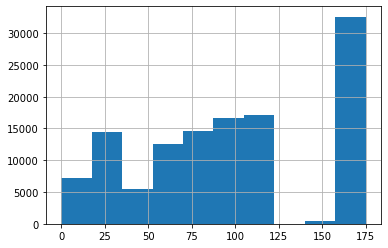

In [32]:
df.time_left.hist()

In [33]:
df.ct_score.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32.])

In [34]:
df.t_score.unique()

array([ 0.,  1.,  2.,  3.,  4., 11., 12., 13., 14., 15.,  5.,  6.,  8.,
        9., 10.,  7., 16., 17., 18., 19., 20., 21., 23., 22., 24., 26.,
       27., 28., 29., 30., 25., 31., 32., 33.])

<AxesSubplot:>

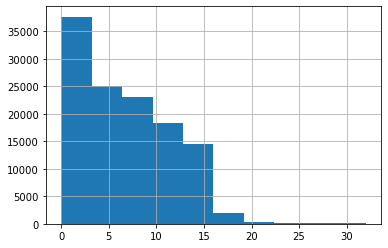

In [35]:
df.ct_score.hist()

<AxesSubplot:>

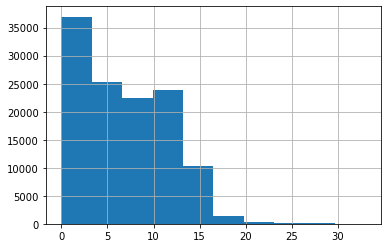

In [36]:
df.t_score.hist()

In [37]:
maps_played = df.map.unique()

print('Se juegan únicamente ',len(maps_played),'mapas en eSports')

Se juegan únicamente  8 mapas en eSports


In [38]:
df.bomb_planted.value_counts()

print('0 indica no plantada, 1 indica plantada')

0 indica no plantada, 1 indica plantada


In [39]:
df.round_winner.value_counts()

T     61746
CT    59308
Name: round_winner, dtype: int64

## Análisis de variables por equipo

<AxesSubplot:>

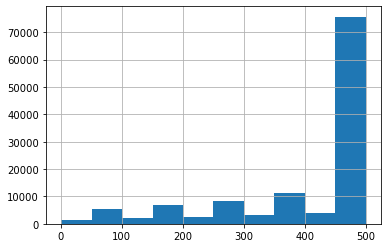

In [40]:
df.ct_health.hist()


<AxesSubplot:>

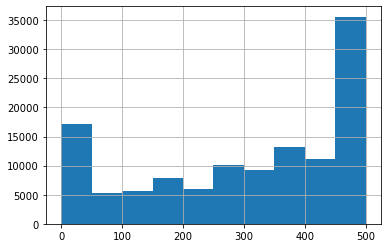

In [41]:
df.t_armor.hist()

Se distinguen las siguientes variables:
- Salud (CT y TT) [Valor entre 0 y 500]
- Armor (CT y TT) [Valor entre 0 y 500]
- Helmet (CT y TT) [Valor entre 0 y 5]
- Plata (CT y TT). Considerar que el maximo es 16000 por jugador
- Defuse kits disponbiles
- Armas a disposición (deben tenerlas encima para la captura lógicamente).
    - Respecto a las armas se distinguen las siguientes categorías. Se deberá dividir las columnas y crear familias, salvo que interese algun arma particular:
        - Pistols
        - Shotguns
        - SMGs
        - Rifles
        - Sniper Rifles	
        - Machine Guns
        - Grenades (Flash, HE, Decoy, Smoke, Molotov, Incendiaria)
        - Other Equipment (no se considera cuchi ni la Zeus)

In [42]:
df.ct_helmets.value_counts()

0.0    37743
5.0    18332
1.0    17939
2.0    16121
4.0    15478
3.0    15441
Name: ct_helmets, dtype: int64

In [43]:
df.ct_defuse_kits.value_counts()

0.0    41257
1.0    27212
2.0    17092
3.0    15288
4.0    11952
5.0     8253
Name: ct_defuse_kits, dtype: int64

In [44]:
df.t_weapon_ak47.value_counts()

0.0    51216
1.0    24667
2.0    20719
3.0    14232
4.0     8409
5.0     1811
Name: t_weapon_ak47, dtype: int64

<AxesSubplot:>

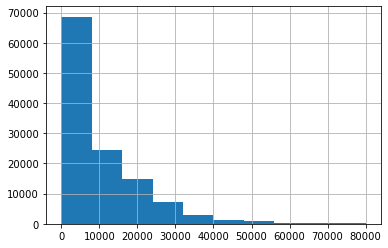

In [45]:
df.ct_money.hist()